<a href="https://colab.research.google.com/github/veeralipi22/12-Decision-tree-company-data/blob/main/Assignment_Decision_Tree_company_data(N).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#for encoding
from sklearn.model_selection import train_test_split#for train test splitting
from sklearn.tree import DecisionTreeClassifier#for decision tree object
from sklearn.metrics import classification_report, confusion_matrix#for checking testing results
from sklearn.tree import plot_tree#for visualizing tree

In [ ]:
#reading the data
df = pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
conditions = [
    (df['Sales'] < 7),
    (df['Sales'] >= 7) & (df['Sales'] <= 10),
    (df['Sales'] > 10)
]

labels = ['low', 'medium', 'high']

# Use np.select to create a new categorical column based on conditions and labels
import numpy as np
df['Sales_Category'] = np.select(conditions, labels, default='unknown')

# Display the DataFrame
print(df)

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US Sales_Categor

In [ ]:
df= df.drop('Sales',axis=1)

In [ ]:
#getting information of dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CompPrice       400 non-null    int64 
 1   Income          400 non-null    int64 
 2   Advertising     400 non-null    int64 
 3   Population      400 non-null    int64 
 4   Price           400 non-null    int64 
 5   ShelveLoc       400 non-null    object
 6   Age             400 non-null    int64 
 7   Education       400 non-null    int64 
 8   Urban           400 non-null    object
 9   US              400 non-null    object
 10  Sales_Category  400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [ ]:
df.shape


(400, 11)

In [ ]:
df.isnull().any()


CompPrice         False
Income            False
Advertising       False
Population        False
Price             False
ShelveLoc         False
Age               False
Education         False
Urban             False
US                False
Sales_Category    False
dtype: bool

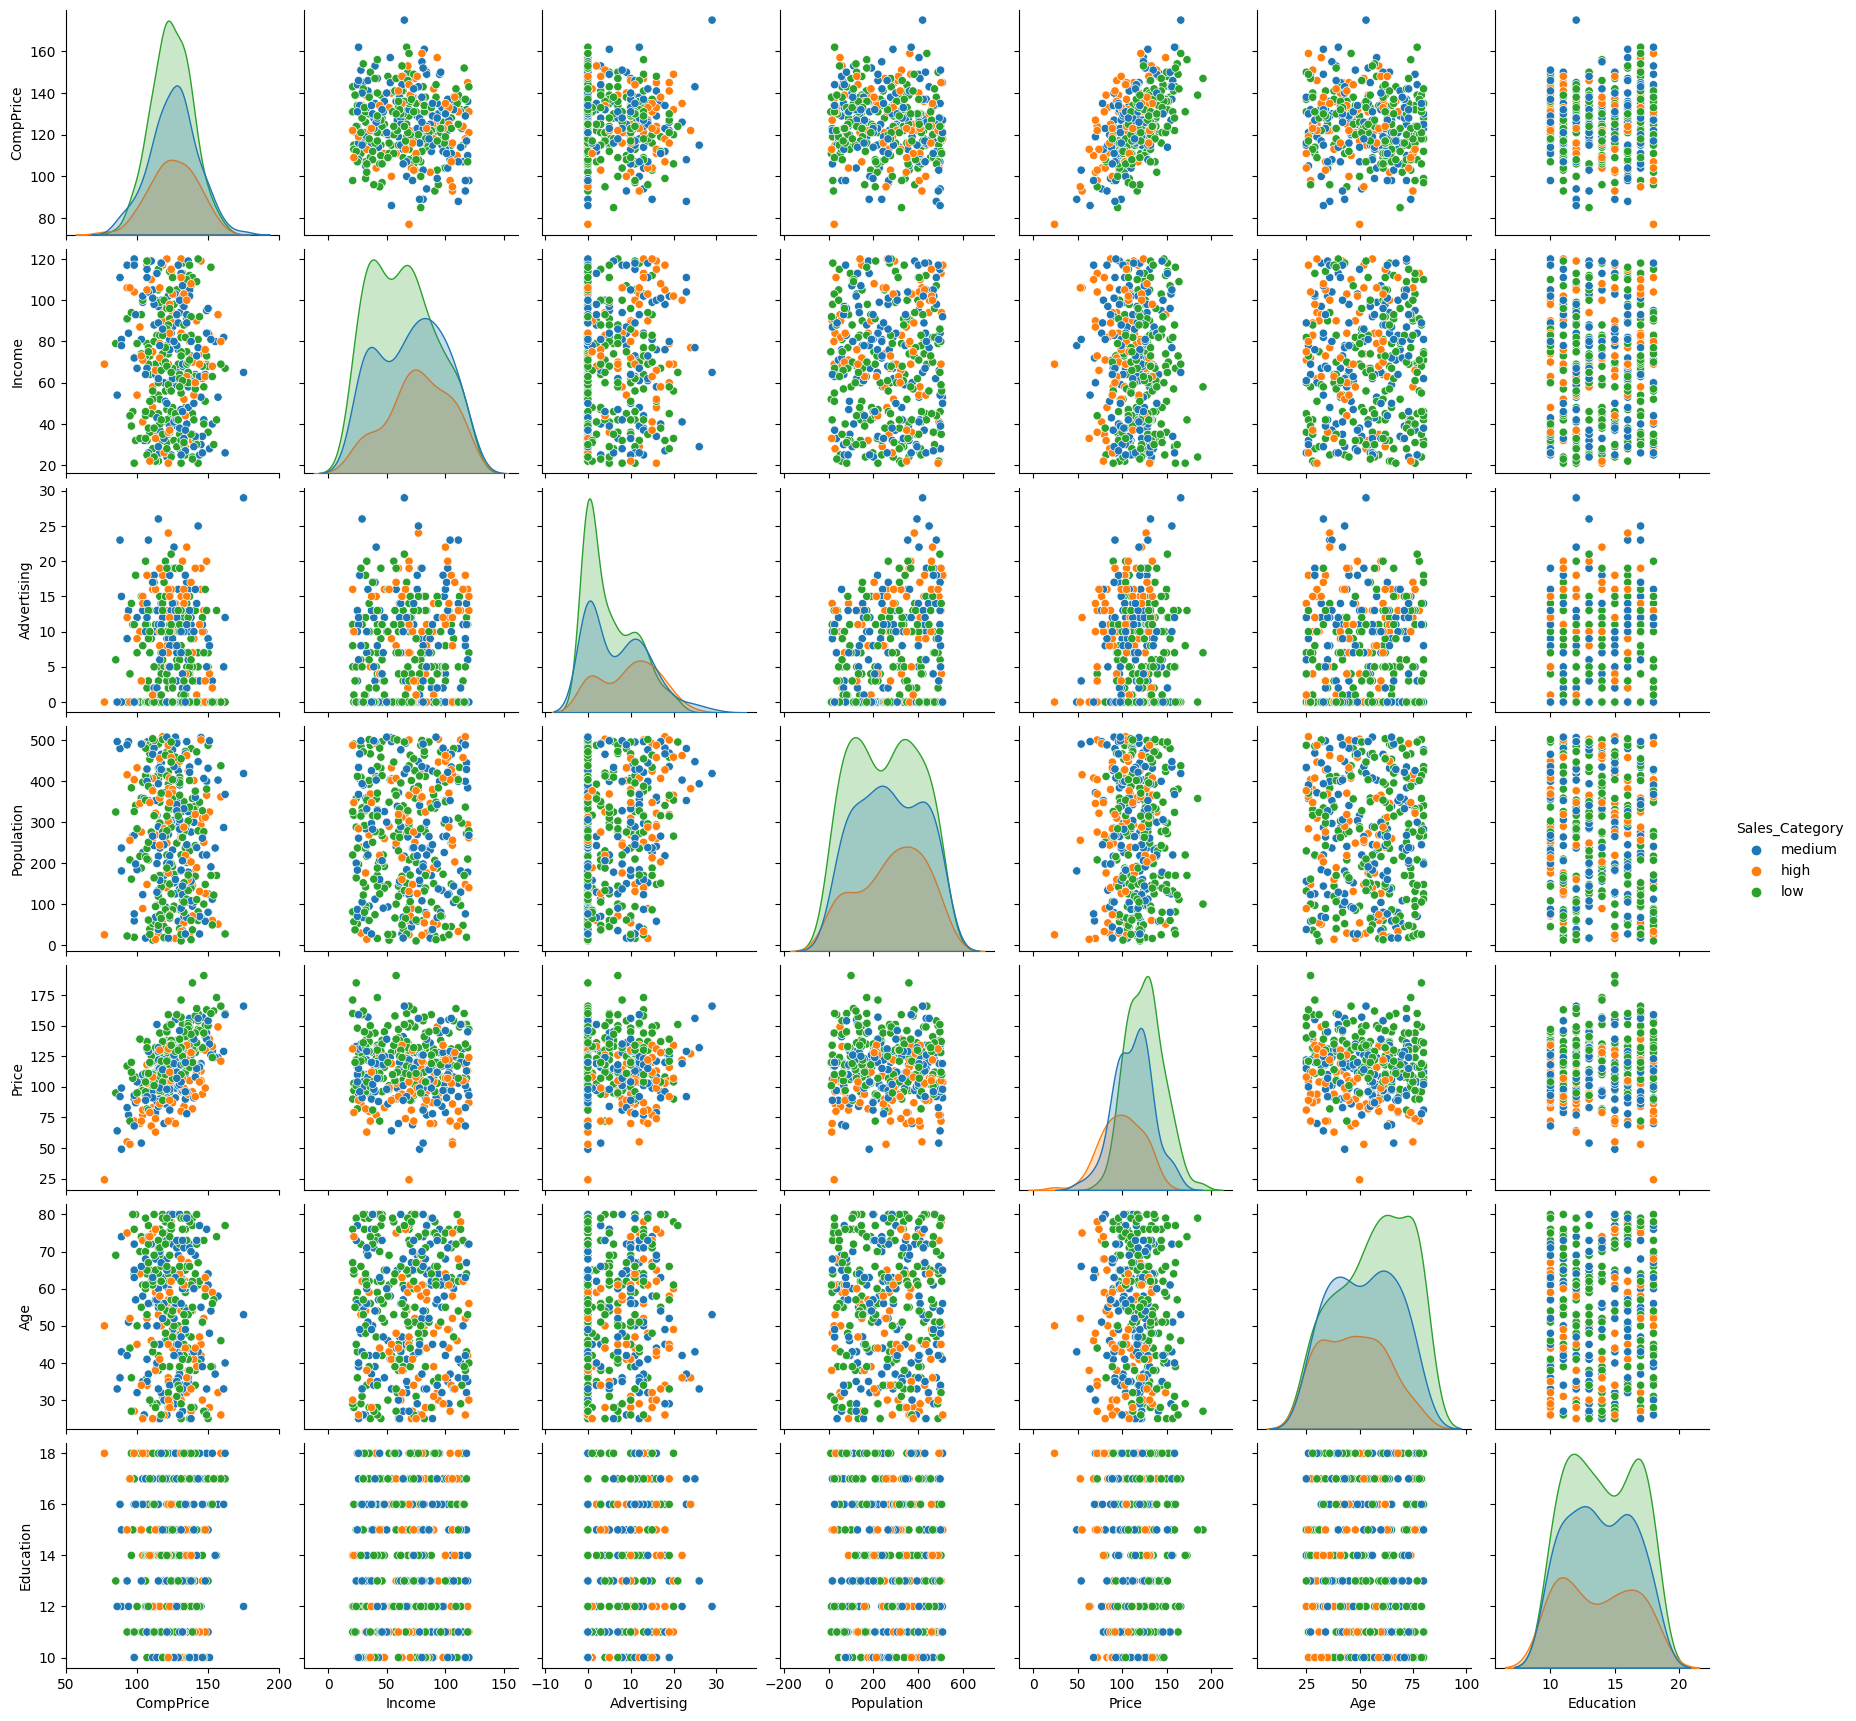

In [ ]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'Sales_Category')

In [ ]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Sales_Category,Urban_Yes,US_Yes
0,138,73,11,276,120,Bad,42,17,medium,1,1
1,111,48,16,260,83,Good,65,10,high,1,1
2,113,35,10,269,80,Medium,59,12,high,1,1
3,117,100,4,466,97,Medium,55,14,medium,1,1
4,141,64,3,340,128,Bad,38,13,low,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,high,1,1
396,139,23,3,37,120,Medium,55,11,low,0,1
397,162,26,12,368,159,Medium,40,18,medium,1,1
398,100,79,7,284,95,Bad,50,12,low,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CompPrice       400 non-null    int64 
 1   Income          400 non-null    int64 
 2   Advertising     400 non-null    int64 
 3   Population      400 non-null    int64 
 4   Price           400 non-null    int64 
 5   ShelveLoc       400 non-null    object
 6   Age             400 non-null    int64 
 7   Education       400 non-null    int64 
 8   Sales_Category  400 non-null    object
 9   Urban_Yes       400 non-null    uint8 
 10  US_Yes          400 non-null    uint8 
dtypes: int64(7), object(2), uint8(2)
memory usage: 29.0+ KB


In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [ ]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
df['Sales_Category']=df['Sales_Category'].map({'low':1,'medium':2,'high':3})

df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Sales_Category,Urban_Yes,US_Yes
0,138,73,11,276,120,3,42,17,2,1,1
1,111,48,16,260,83,1,65,10,3,1,1
2,113,35,10,269,80,2,59,12,3,1,1
3,117,100,4,466,97,2,55,14,2,1,1
4,141,64,3,340,128,3,38,13,1,1,0


In [ ]:
x=df.iloc[:,0:8]
y=df['Sales_Category']

In [ ]:
df['Sales_Category'].unique()


array([2, 3, 1])

In [ ]:
df.Sales_Category.value_counts()


1    184
2    138
3     78
Name: Sales_Category, dtype: int64

In [ ]:
colnames = list(df.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Sales_Category',
 'Urban_Yes',
 'US_Yes']

In [ ]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

Building Decision Tree Classifier using Entropy Criteria

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
from sklearn import tree


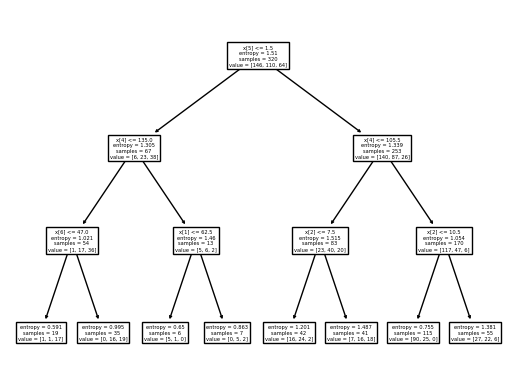

In [ ]:
#PLot the decision tree
tree.plot_tree(model);

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    38
3    22
2    20
dtype: int64

In [ ]:
preds


array([2, 1, 1, 2, 2, 1, 3, 2, 1, 3, 2, 1, 1, 2, 3, 2, 1, 2, 1, 1, 3, 2,
       1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 3, 2, 1, 1, 1, 1, 1, 3, 2, 1, 3, 3, 2, 2, 1, 1, 1, 2, 1, 1, 3,
       3, 1, 1, 3, 3, 3, 2, 1, 2, 3, 1, 1, 1, 3])

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions


col_0,1,2,3
Sales_Category,,,
1,27,8,3
2,10,8,10
3,1,4,9


In [ ]:
# Accuracy
np.mean(preds==y_test)

0.55

Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)


In [ ]:
model_gini.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)


0.55

Decision Tree Regression Example

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [ ]:
#Find the accuracy
model.score(X_test,y_test)

-0.773525311096358